<div style="text-align: center;">

### EASTER 2025 SEMESTER  EXAMINATION 


FACULTY OF ENGINEERING, DESIGN AND TECHNOLOGY 

DEPARTMENT OF COMPUTING AND TECHNOLOGY 

MASTER OF INFORMATION TECHNOLOGY

YEAR 1 SEMESTER:  2

COURSE CODE:  DSC8204

COURSE NAME:  DATA ANALYSIS AND PROCESS MINING



</div>


<div style="text-align: left;">

#### Name: Ogabaniruhanga September

#### Access number: B30918

#### Registration Number: S24M10/006

</div>

In [8]:
# Importing necessary libraries for data manipulation and visualization
# Installing and importing the libraries to read the dataset
# %pip install pandas
# %pip install openpyxl
# %pip install numpy
# %pip install seaborn
# %pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### GOAL 5

##### Survey Data Analysis in the Job Market [30 Marks]

Context: Data Science gained a reputation for being a highly sought after career when a Harvard Business Review article tagged it “the sexiest job of the 21st century.” Thishas seen a surge in career changes for many and a demand for data analysts in the job market. As a cohort of the MIT Data Analytics and Process Mining class at UCU, you would like to ensure that the skills you attain are the most sought after in the job market. Therefore, use your acquired skills to get insights into the provided survey data.

##### 1. Data Collection and Preprocessing:

a. Data Source: You are provided with a dataset “DataAnalyst.csv” which contains job market skills for a Data Analyst and how they’re valued. 

b. Preprocess the dataset for further analyses

#### 2. Exploratory Data Analysis:

a. Use suitable statistical tools/visuals to pinpoint the Industry that has the greatest need for Data Analysts.

b. What are the Salary Estimates for the skills most frequently required in the job market?

#### 3. Business Intelligence and Skills Classification:

a. The Job Description has various skills listed. Using suitable statistical tools, highlight the skills that are highly sought after for roles in Data Analytics.


In [28]:
# Load dataset
data = pd.read_csv('DataAnalyst.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Show initial info
print(f"\nDataset shape: {data.shape}")
print("\nData Summary:")
print(data.info())

First few rows of the dataset:
                                           Job Title  \
0  Data Analyst, Center on Immigration and Justic...   
1                               Quality Data Analyst   
2  Senior Data Analyst, Insights & Analytics Team...   
3                                       Data Analyst   
4                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   

                              Company Name      

After loading the dataset, print out the basic information like shape and the summary of the DataFrame. This shows that the dataset has 5631 job postings with 5631 rows and 15 columns. The roles vary including Data Analyst, Quality Data Analyst, and Senior Data Analyst with salary ranging from $37,000 to $66,000 and Company Ratings from 3.2 to 4.1. The dataset has 1 float, 1 integers and 13 objects.

In [20]:
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Max Salary,Python,SQL,Excel,Tableau,Power BI,R,Machine Learning,Statistics,Data Visualization
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,...,66000.0,1,1,0,0,0,1,0,1,0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,...,66000.0,0,1,1,0,0,1,0,1,0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,...,66000.0,1,1,1,1,0,1,0,0,1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,...,66000.0,0,1,0,1,0,1,0,0,1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,...,66000.0,1,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,Data Analyst (Power BI + SAP),$51K-$93K (Glassdoor est.),"KORE1, a nationwide provider of staffing and r...",4.9,KORE1 Technologies\n4.9,"San Jose, CA","Irvine, CA",51 to 200 employees,2005,Company - Private,...,93000.0,0,1,1,1,1,1,0,0,0
5627,Technical Business or Data Analyst,$46K-$72K (Glassdoor est.),Job Description\nHi\n\nHope you are doing grea...,4.4,Adwait Algorithm\n4.4,"Santa Clara, CA","Houston, TX",51 to 200 employees,2015,Company - Private,...,72000.0,0,1,0,0,0,1,0,0,0
5628,Data Analyst Junior,$44K-$82K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","Fremont, CA","Woodridge, IL",51 to 200 employees,2008,Company - Private,...,82000.0,0,1,1,0,0,1,0,1,0
5629,Sr. HR Data Analyst,$44K-$82K (Glassdoor est.),POSITION SUMMARY:\n\nThe Sr. HR Data Analyst p...,3.5,Cepheid\n3.5,"Sunnyvale, CA","Sunnyvale, CA",1001 to 5000 employees,1996,Company - Private,...,82000.0,0,0,1,0,0,1,0,0,0


In [30]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,5621,5622,5623,5624,5625,5626,5627,5628,5629,5630
Job Title,"Data Analyst, Center on Immigration and Justic...",Quality Data Analyst,"Senior Data Analyst, Insights & Analytics Team...",Data Analyst,Reporting Data Analyst,Data Analyst,Business/Data Analyst (FP&A),Data Science Analyst,Data Analyst,"Data Analyst, Merchant Health",...,Junior Data Analyst,Data Analyst,Junior Data Analyst,Financial Data Analyst,Data Analyst,Data Analyst (Power BI + SAP),Technical Business or Data Analyst,Data Analyst Junior,Sr. HR Data Analyst,Data Analyst â Junior
Salary Estimate,$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),...,$43K-$69K (Glassdoor est.),$65K-$120K (Glassdoor est.),$65K-$120K (Glassdoor est.),$58K-$93K (Glassdoor est.),$47K-$74K (Glassdoor est.),$51K-$93K (Glassdoor est.),$46K-$72K (Glassdoor est.),$44K-$82K (Glassdoor est.),$44K-$82K (Glassdoor est.),$89K-$151K (Glassdoor est.)
Job Description,Are you eager to roll up your sleeves and harn...,Overview\n\nProvides analytical and technical ...,We’re looking for a Senior Data Analyst who ha...,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,About Cubist\nCubist Systematic Strategies is ...,Two Sigma is a different kind of investment ma...,Data Science Analyst\n\nJob Details\nLevel\nEx...,The Data Analyst is an integral member of the ...,About Us\n\nRiskified is the AI platform power...,...,Job Description\nJob description\nInterpret da...,Job Description\nLooking for a Data Analyst fo...,Job Description\nJob description\nInterpret da...,"Job Description\nAbout\n\nDivercity, a HR-tech...","Job Description\n\nJob Duties: Analyze, docume...","KORE1, a nationwide provider of staffing and r...",Job Description\nHi\n\nHope you are doing grea...,Job Description\nJob description\nInterpret da...,POSITION SUMMARY:\n\nThe Sr. HR Data Analyst p...,"Job description\nInterpret data, analyze resul..."
Rating,3.2,3.8,3.4,4.1,3.9,3.9,4.4,3.7,4.0,4.4,...,5.0,4.0,5.0,4.0,4.1,4.9,4.4,5.0,3.5,5.0
Company Name,Vera Institute of Justice\n3.2,Visiting Nurse Service of New York\n3.8,Squarespace\n3.4,Celerity\n4.1,FanDuel\n3.9,Point72\n3.9,Two Sigma\n4.4,GNY Insurance Companies\n3.7,DMGT\n4.0,Riskified\n4.4,...,"Staffigo Technical Services, LLC\n5.0",E Base Technologies\n4.0,"Staffigo Technical Services, LLC\n5.0",Divercity\n4.0,Cogent Infotech\n4.1,KORE1 Technologies\n4.9,Adwait Algorithm\n4.4,"Staffigo Technical Services, LLC\n5.0",Cepheid\n3.5,"Staffigo Technical Services, LLC\n5.0"
Location,"New York, NY","New York, NY","New York, NY","New York, NY","New York, NY","New York, NY","New York, NY","New York, NY","New York, NY","New York, NY",...,"Norfolk, VA","Sunnyvale, CA","Fremont, CA","Redwood City, CA","Sunnyvale, CA","San Jose, CA","Santa Clara, CA","Fremont, CA","Sunnyvale, CA","Fremont, CA"
Headquarters,"New York, NY","New York, NY","New York, NY","McLean, VA","New York, NY","Stamford, CT","New York, NY","New York, NY","London, United Kingdom","New York, NY",...,"Woodridge, IL","Fremont, CA","Woodridge, IL","Los Angeles, CA","Pittsburgh, PA","Irvine, CA","Houston, TX","Woodridge, IL","Sunnyvale, CA","Woodridge, IL"
Size,201 to 500 employees,10000+ employees,1001 to 5000 employees,201 to 500 employees,501 to 1000 employees,1001 to 5000 employees,1001 to 5000 employees,201 to 500 employees,5001 to 10000 employees,501 to 1000 employees,...,51 to 200 employees,51 to 200 employees,51 to 200 employees,1 to 50 employees,201 to 500 employees,51 to 200 employees,51 to 200 employees,51 to 200 employees,1001 to 5000 employees,51 to 200 employees
Founded,1961,1893,2003,2002,2009,2014,2001,1914,1896,2013,...,2008,-1,2008,-1,2003,2005,2015,2008,1996,2008
Type of ownership,Nonprofit Organization,Nonprofit Organization,

In [22]:
# Check the column names of the DataFrame
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Min Salary', 'Max Salary', 'Python', 'SQL', 'Excel',
       'Tableau', 'Power BI', 'R', 'Machine Learning', 'Statistics',
       'Data Visualization'],
      dtype='object')

In [25]:
# Check for duplicate rows in the dataset
duplicates = data.duplicated().sum()
print(f"\n\nThere are {duplicates} duplicate values.\n" if duplicates else "\n\nThere are no duplicates.\n")



There are no duplicates.



In [4]:
# Check for missing values and fill them
missing_values = data.isnull().sum()
print("\nMissing Values Count:")
print(missing_values)


Missing Values Count:
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         2
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64


This checks for any missing values in each column of the DataFrame and prints the count of missing entries. It shows that the dataset contains 2 missing entries in the Company Name column and all other columns are complete with no missing values.

In [6]:
# Fill missing values in 'Company Name' with 'Unknown'
data['Company Name'].fillna('Unknown', inplace=True)


This fills the missing values in the Company Name column with the string "Unknown". 

In [11]:
# Step 2: Extracting min and max salary values
def extract_salary(salary_str):
    match = re.findall(r'\$(\d+)K-\$(\d+)K', salary_str)
    if match and len(match) == 1:
        min_salary = int(match[0][0]) * 1000
        max_salary = int(match[0][1]) * 1000
        return min_salary, max_salary
    return np.nan, np.nan

# Apply the extraction function to create new salary columns
data[['Min Salary', 'Max Salary']] = data['Salary Estimate'].apply(lambda x: pd.Series(extract_salary(str(x))))

2. Exploratory Data Analysis: 

a. Use suitable statistical tools/visuals to pinpoint the Industry that has the greatest need for Data Analysts. 

b. What are the Salary Estimates for the skills most frequently required in the job market? 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13740\941665835.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="Blues_r")


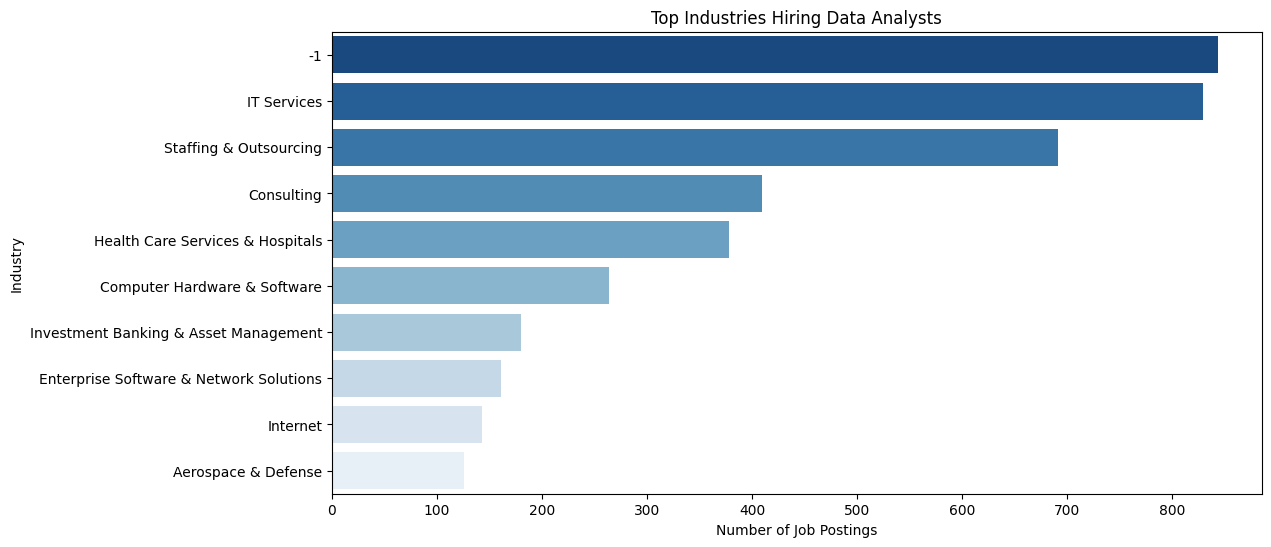

In [12]:
# Counting the occurrences of each industry
industry_counts = data['Industry'].value_counts().head(10)

# Plotting the top industries hiring Data Analysts
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="Blues_r")
plt.xlabel("Number of Job Postings")
plt.ylabel("Industry")
plt.title("Top Industries Hiring Data Analysts")
plt.show()

In [13]:
# Salary Estimates for Skills
# Create a list of common skills relevant to Data Analysts
common_skills = [
    'Python', 'SQL', 'Excel', 'Tableau', 'Power BI', 'R', 
    'Machine Learning', 'Statistics', 'Data Visualization'
]

# Create skill columns in the DataFrame
for skill in common_skills:
    data[skill] = data['Job Description'].apply(lambda x: 1 if skill.lower() in str(x).lower() else 0)

# Create a DataFrame to store average salaries for skills
salary_data = {}
for skill in common_skills:
    avg_min_salary = data[data[skill] == 1]['Min Salary'].mean()
    avg_max_salary = data[data[skill] == 1]['Max Salary'].mean()
    salary_data[skill] = {
        'Avg Min Salary': avg_min_salary,
        'Avg Max Salary': avg_max_salary
    }

# Convert to DataFrame for better visualization
salary_df = pd.DataFrame(salary_data).T

# Print the salary estimates
print("\nAverage Salary Estimates for Skills:")
print(salary_df)


Average Salary Estimates for Skills:
                    Avg Min Salary  Avg Max Salary
Python                55882.971268    94051.156272
SQL                   54130.252101    90807.322929
Excel                 53716.583796    90039.777713
Tableau               54752.605976    92503.822099
Power BI              53442.857143    90008.163265
R                     54087.416981    90758.750673
Machine Learning      55655.092593    93233.796296
Statistics            53627.016129    90336.693548
Data Visualization    54576.413959    92720.818291


<Figure size 1000x500 with 0 Axes>

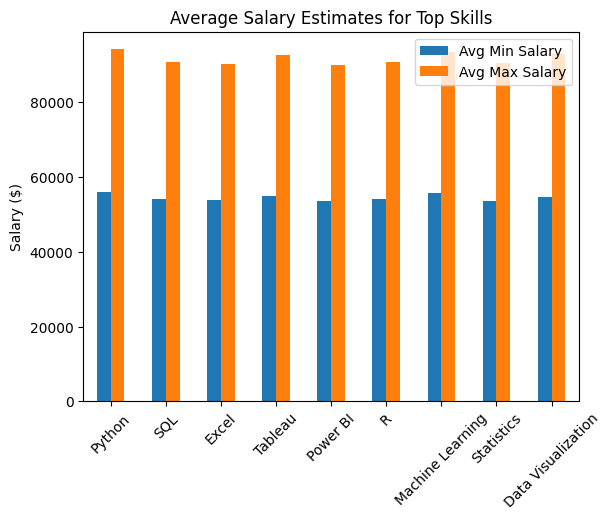

In [14]:
# Plotting the salary comparison
plt.figure(figsize=(10, 5))
salary_df[['Avg Min Salary', 'Avg Max Salary']].plot(kind='bar')
plt.title("Average Salary Estimates for Top Skills")
plt.ylabel("Salary ($)")
plt.xticks(rotation=45)
plt.show()

This graph shows the the average minimum and maximum salary estimates for in-demand skills ralated to Data Analysts. It shows that Python and SQL have higher average salaries showing their value in the job market, the average maximum salary is higher than the minimum for all skills

#### 3. Business Intelligence and Skills Classification:

a. The Job Description has various skills listed. Using suitable statistical tools, highlight the skills that are highly sought after for roles in Data Analytics.

In [15]:
# Count occurrences of each skill in the job descriptions
skills_count = {skill: data['Job Description'].str.contains(skill, case=False).sum() for skill in common_skills}

# Convert to DataFrame for visualization
skills_count_df = pd.DataFrame(list(skills_count.items()), columns=['Skill', 'Count'])

# Identify the most sought-after skills
top_skills = skills_count_df.sort_values(by='Count', ascending=False)

# Print the top skills
print("\nTop Sought-after Skills:")
print(top_skills)


Top Sought-after Skills:
                Skill  Count
5                   R   5630
2               Excel   3455
1                 SQL   3373
7          Statistics   1500
3             Tableau   1453
0              Python   1439
8  Data Visualization    839
4            Power BI    500
6    Machine Learning    438


This shows that the leading skill is R since it is the most in-demand skill with 5,630 mentions in job postings, Excel and SQL follow with 3,455 and 3,373 mentions, Statistics ranks fourth with 1,500 mentions then Skills in Tableau with 1,453 mentions.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13740\1711996427.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Skill', data=top_skills, palette="Greens_r")


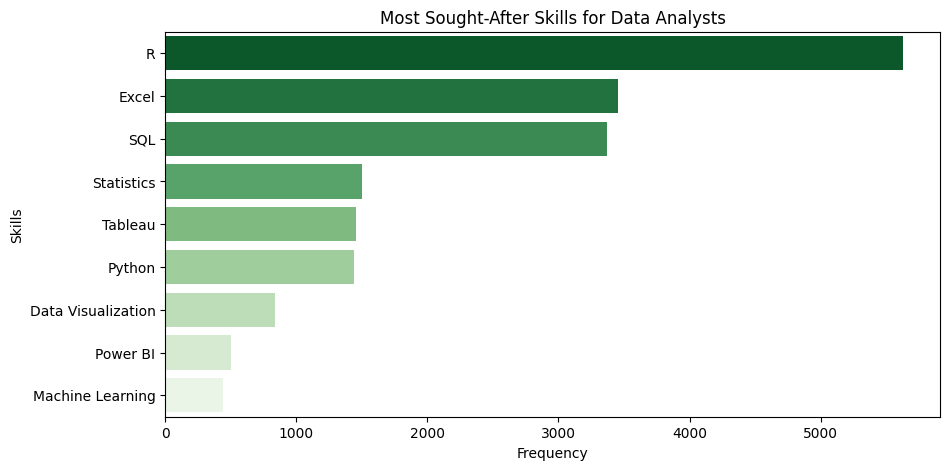

In [16]:
# Plotting the skills frequency
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Skill', data=top_skills, palette="Greens_r")
plt.title("Most Sought-After Skills for Data Analysts")
plt.xlabel("Frequency")
plt.ylabel("Skills")
plt.show()

This graph shows the frequency of various skills mentioned in job descriptions for Data Analyst positions. It shows that R is the most requested skill thus its high demand in job postings, Excel and SQL follow meaning that they are critical for Data Analysts and other skills like Statistics and Tableau are less requested for but still represent valuable competencies in the field. The lowest frequencies for skills like Machine Learning and Power BI suggest that there is overall less demand compared to the other skills.

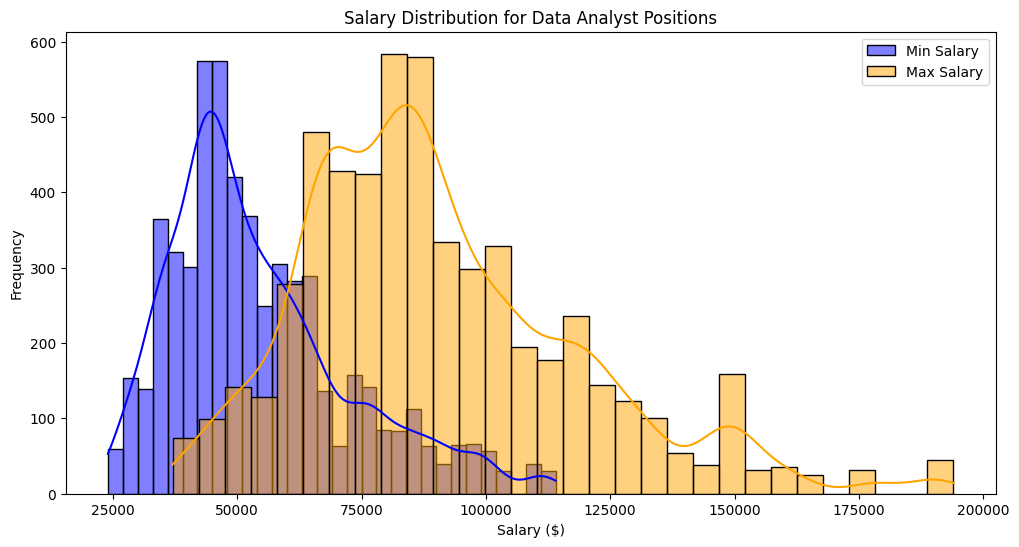

In [17]:
# Salary Distribution:
plt.figure(figsize=(12, 6))
sns.histplot(data['Min Salary'], bins=30, kde=True, color='blue', label='Min Salary')
sns.histplot(data['Max Salary'], bins=30, kde=True, color='orange', label='Max Salary')
plt.xlabel("Salary ($)")
plt.ylabel("Frequency")
plt.title("Salary Distribution for Data Analyst Positions")
plt.legend()
plt.show()

This graph illustrates the distribution of minimum and maximum salaries for Data Analyst positions. There is an increased number of postings around the $50,000 to $75,000 range for both minimum and maximum salaries indicating that there is a common compensation level in the market.

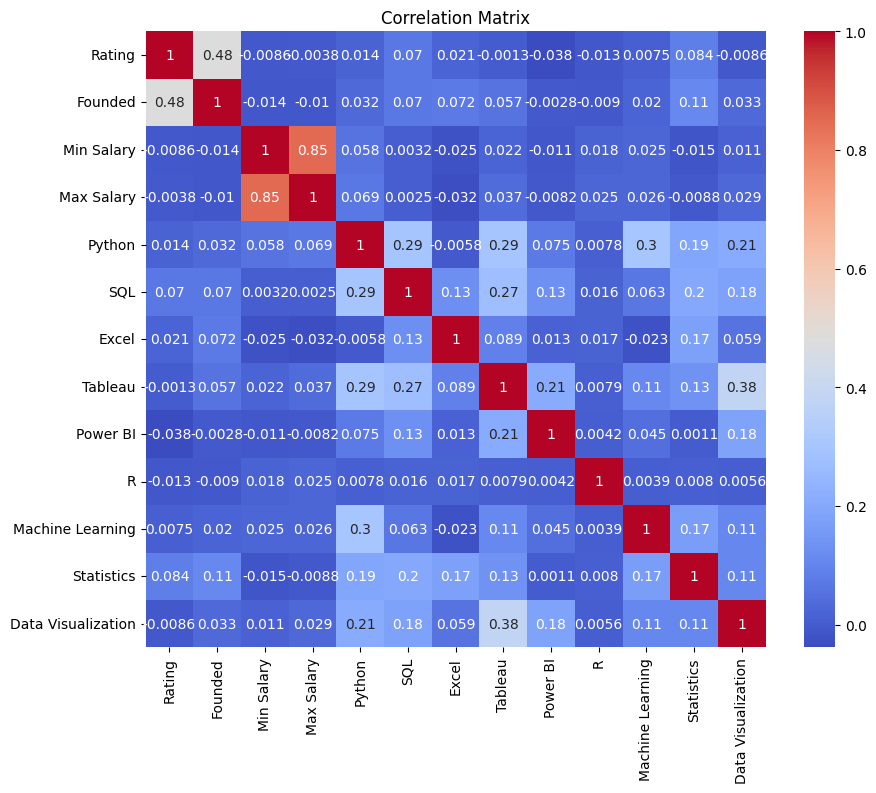

In [18]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

This graph relationships between various factors like company ratings, salary estimates, and the presence of certain skills. Python and Machine Learning show a strong correlation with Max Salary, indicating that proficiency in these skills may lead to higher salary potential, and Rating and Min Salary show a moderate correlation indicating that companies with higher ratings tend to offer better minimum salaries.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13740\1247833080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette="viridis")


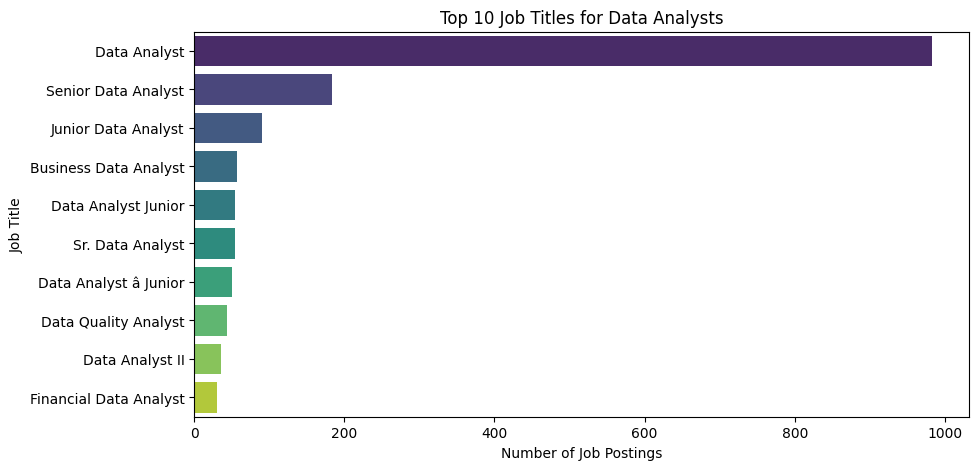

In [19]:
# Job Title Analysis
job_title_counts = data['Job Title'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette="viridis")
plt.title("Top 10 Job Titles for Data Analysts")
plt.xlabel("Number of Job Postings")
plt.ylabel("Job Title")
plt.show()

This graph shows the distribution of job titles to see which roles are most common within the dataset. It shows that Data Analyst is the most frequently posted title, followed by Senior Data Analyst and Junior Data Analyst indicating a diverse range of experience levels sought by employers.